In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.io
import os, sys

In [19]:
sys.path.append(os.path.expanduser('~/projects/2017-kohl/repo/'))
from pynalysis import utils

In [ ]:
# Load struct using scipy
mat = utils.load_mat_struct(os.path.expanduser('~/data/kohl/raw/CGCC5.4a.mat'))

In [20]:
# Navigate struct
dat = mat['imaging']
session = dat.date_2017_11_16
area1 = session.area1
data = area1.plane2

In [21]:
# Get/set data dimensions
shape = data.trialByTrialSpikes.T.shape
binsize = 1
maxtime = 63//binsize
nb_units = 84
frame_duration = 1.0/15

In [22]:
# Load data into dense array
A = utils.extract_dense_spike_raster(data.trialByTrialSpikes.T, maxtime=maxtime, binsize=binsize)
tmax= frame_duration*maxtime*binsize
extent = (0,tmax,0,nb_units)

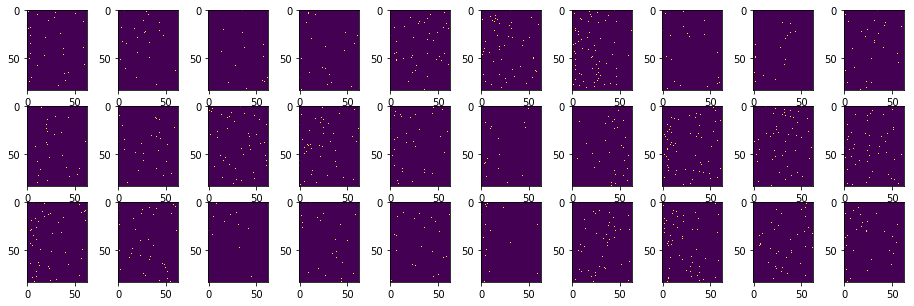

In [23]:
# Plot individual trials
fd = (3,10)
plt.figure(figsize=(16,5))
for i in range(np.prod(fd)):
    plt.subplot(fd[0],fd[1],i+1) 
    plt.imshow(A[i])

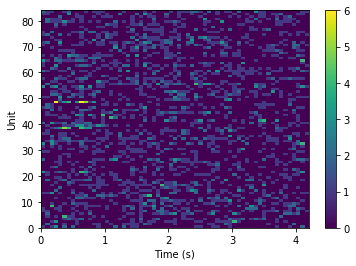

In [24]:
# Plot PSTH
psth = A.sum(axis=0)
plt.imshow(psth,aspect='auto',extent=extent)
plt.colorbar()
plt.xlabel("Time (s)")
plt.ylabel("Unit")